C:\Users\shiva\AppData\Local\Temp\ipykernel_9164\740113179.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv(file_path, parse_dates=['Dates'], index_col='Dates')


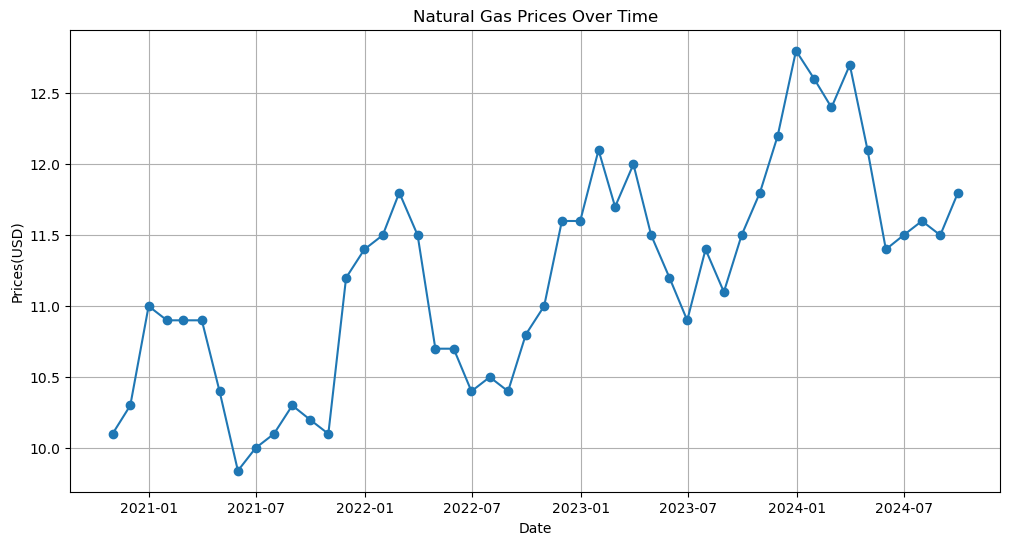

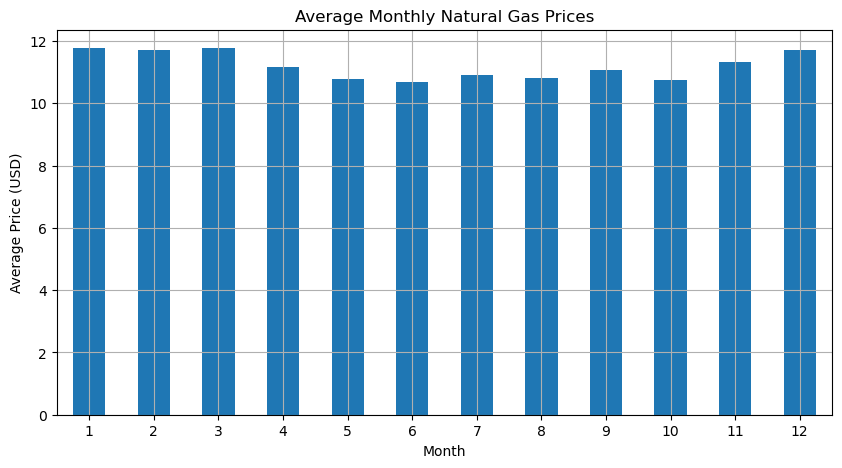

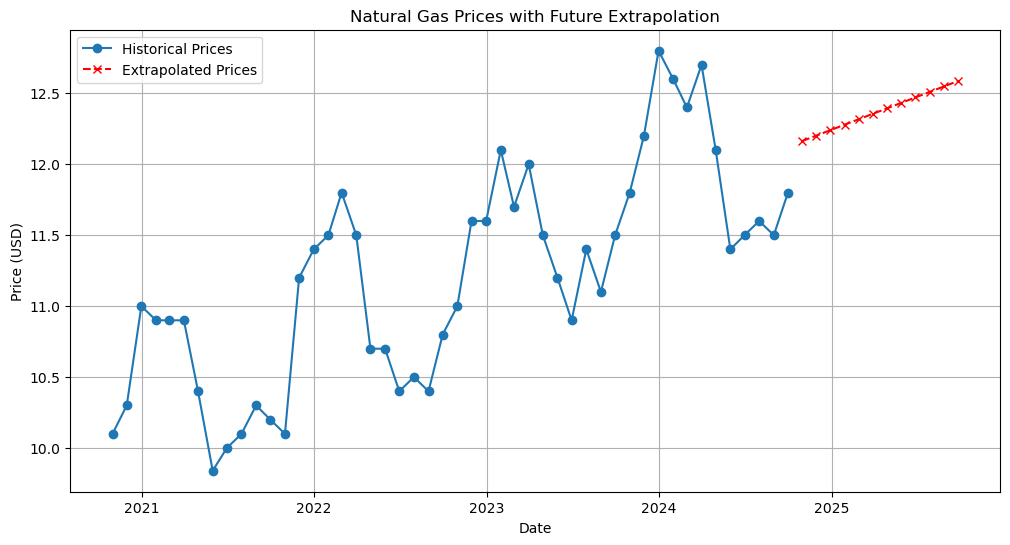

Estimated price on 2025-01-15: $12.26
Calculated contract value: $1842.27


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from datetime import datetime, timedelta

# Load the data
file_path = 'C:/Users/shiva/Downloads/Nat_Gas.csv'  # Update with the correct file path
data = pd.read_csv(file_path, parse_dates=['Dates'], index_col='Dates')

# Plot the data to visualize trends
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Prices'], marker='o', linestyle='-')
plt.title('Natural Gas Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Prices(USD)')
plt.grid(True)
plt.show()

# Extract year and month for trend analysis
data['Year'] = data.index.year
data['Month'] = data.index.month

# Calculate average price per month across all years
monthly_avg = data.groupby('Month')['Prices'].mean()

# Plot monthly average prices
plt.figure(figsize=(10, 5))
monthly_avg.plot(kind='bar')
plt.title('Average Monthly Natural Gas Prices')
plt.xlabel('Month')
plt.ylabel('Average Price (USD)')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

# Prepare data for linear regression model
# Convert dates to ordinal numbers for regression analysis
data['Date_ordinal'] = data.index.map(datetime.toordinal)
X = data['Date_ordinal'].values.reshape(-1, 1)
y = data['Prices'].values

# Train a linear regression model
model = LinearRegression()
model.fit(X, y)

# Function to estimate the price for any given date
def estimate_price(date):
    date_ordinal = datetime.strptime(date, '%Y-%m-%d').toordinal()
    estimated_price = model.predict([[date_ordinal]])[0]
    return estimated_price

# Extrapolate prices for the next year
dates_future = [data.index[-1] + timedelta(days=30*i) for i in range(1, 13)]
X_future = np.array([d.toordinal() for d in dates_future]).reshape(-1, 1)
prices_future = model.predict(X_future)

# Plot the extrapolated data
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Prices'], marker='o', linestyle='-', label='Historical Prices')
plt.plot(dates_future, prices_future, marker='x', linestyle='--', color='red', label='Extrapolated Prices')
plt.title('Natural Gas Prices with Future Extrapolation')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

# Example usage
print(f"Estimated price on 2025-01-15: ${estimate_price('2025-01-15'):.2f}")

# Function to calculate the contract value
def calculate_contract_value(injection_dates, withdrawal_dates, injection_rate, withdrawal_rate, max_volume, storage_costs):
    total_cost = 0.0
    total_volume = 0.0

    # Process injection dates
    for date in injection_dates:
        price = estimate_price(date)
        volume = min(injection_rate, max_volume - total_volume)
        total_cost += price * volume
        total_volume += volume

    # Process withdrawal dates
    for date in withdrawal_dates:
        price = estimate_price(date)
        volume = min(withdrawal_rate, total_volume)
        total_cost -= price * volume
        total_volume -= volume

    # Add storage costs
    total_cost += storage_costs

    return total_cost

# Test the function with sample inputs
sample_injection_dates = ['2024-11-01', '2024-12-01']
sample_withdrawal_dates = ['2025-01-01', '2025-02-01']
sample_injection_rate = 1000
sample_withdrawal_rate = 1000
sample_max_volume = 5000
sample_storage_costs = 2000

contract_value = calculate_contract_value(sample_injection_dates, sample_withdrawal_dates, sample_injection_rate, sample_withdrawal_rate, sample_max_volume, sample_storage_costs)
print(f"Calculated contract value: ${contract_value:.2f}")
